In [1]:
# google driveのマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# sys.pathの設定
import sys
sys.path.append('/content/drive/My Drive/DNN_code')
sys.path.append('/content/drive/My Drive/DNN_code/lesson_2_shakyo')  # multi_layer_net

過学習(overfitting)

Generation: 10.正答率（train) = 0.15
             :10.正答率(test) =0.1183
Generation: 20.正答率（train) = 0.27
             :20.正答率(test) =0.1945
Generation: 30.正答率（train) = 0.45
             :30.正答率(test) =0.3283
Generation: 40.正答率（train) = 0.59
             :40.正答率(test) =0.3925
Generation: 50.正答率（train) = 0.66
             :50.正答率(test) =0.4428
Generation: 60.正答率（train) = 0.68
             :60.正答率(test) =0.4742
Generation: 70.正答率（train) = 0.76
             :70.正答率(test) =0.5208
Generation: 80.正答率（train) = 0.8
             :80.正答率(test) =0.5579
Generation: 90.正答率（train) = 0.78
             :90.正答率(test) =0.5933
Generation: 100.正答率（train) = 0.88
             :100.正答率(test) =0.6075
Generation: 110.正答率（train) = 0.87
             :110.正答率(test) =0.632
Generation: 120.正答率（train) = 0.91
             :120.正答率(test) =0.6474
Generation: 130.正答率（train) = 0.89
             :130.正答率(test) =0.6429
Generation: 140.正答率（train) = 0.91
             :140.正答率(test) =0.6681
Generation: 150.正答率（train) = 0.96
      

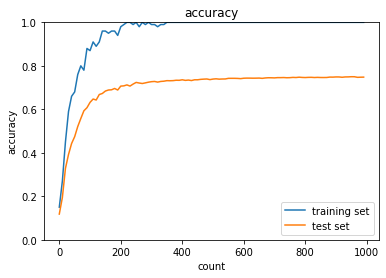

In [3]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

# 過学習を再現するために学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval = 10

for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  d_batch = d_train[batch_mask]

  # 勾配
  grad = network.gradient(x_batch, d_batch)
  optimizer.update(network.params, grad)

  loss = network.loss(x_batch, d_batch)
  train_loss_list.append(loss)


  if (i + 1) % plot_interval == 0:
    accr_test = network.accuracy(x_test, d_test)
    accuracies_test.append(accr_test)
    accr_train = network.accuracy(x_batch, d_batch)
    accuracies_train.append(accr_train)

    print('Generation: '+ str(i+1) + '.正答率（train) = ' + str(accr_train))
    print('             :' + str(i+1) + '.正答率(test) =' + str(accr_test))

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label='training set')
plt.plot(lists, accuracies_test, label='test set')
plt.legend(loc='lower right')
plt.title('accuracy')
plt.xlabel('count')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
# グラフの表示
plt.show()


weight decay    
L2ノルム（ridge回帰）

Generation: 10.正答率（train) = 0.12
             :10.正答率(test) =0.1068
Generation: 20.正答率（train) = 0.29
             :20.正答率(test) =0.154
Generation: 30.正答率（train) = 0.36
             :30.正答率(test) =0.2186
Generation: 40.正答率（train) = 0.37
             :40.正答率(test) =0.2658
Generation: 50.正答率（train) = 0.5
             :50.正答率(test) =0.3156
Generation: 60.正答率（train) = 0.49
             :60.正答率(test) =0.3621
Generation: 70.正答率（train) = 0.66
             :70.正答率(test) =0.4179
Generation: 80.正答率（train) = 0.67
             :80.正答率(test) =0.4605
Generation: 90.正答率（train) = 0.66
             :90.正答率(test) =0.4633
Generation: 100.正答率（train) = 0.77
             :100.正答率(test) =0.5022
Generation: 110.正答率（train) = 0.74
             :110.正答率(test) =0.534
Generation: 120.正答率（train) = 0.72
             :120.正答率(test) =0.5607
Generation: 130.正答率（train) = 0.77
             :130.正答率(test) =0.5763
Generation: 140.正答率（train) = 0.8
             :140.正答率(test) =0.5897
Generation: 150.正答率（train) = 0.75
        

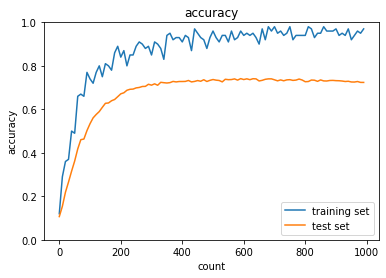

In [4]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

# 過学習を再現するために学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval = 10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定
weight_decay_lambda = 0.1


for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  d_batch = d_train[batch_mask]

  # 勾配
  grad = network.gradient(x_batch, d_batch)
  weight_decay = 0

  for idx in range(1, hidden_layer_num+1):
    grad['W'+str(idx)] = network.layers['Affine'+str(idx)].dW + weight_decay_lambda * network.params['W'+str(idx)]
    grad['b'+str(idx)] = network.layers['Affine'+str(idx)].db
    network.params['W'+str(idx)] -= learning_rate * grad['W'+str(idx)]
    network.params['b'+str(idx)] -= learning_rate * grad['b'+str(idx)]
    # L2正則化
    weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W'+str(idx)] ** 2))

  loss = network.loss(x_batch, d_batch) + weight_decay
  train_loss_list.append(loss)


  if (i + 1) % plot_interval == 0:
    accr_test = network.accuracy(x_test, d_test)
    accuracies_test.append(accr_test)
    accr_train = network.accuracy(x_batch, d_batch)
    accuracies_train.append(accr_train)

    print('Generation: '+ str(i+1) + '.正答率（train) = ' + str(accr_train))
    print('             :' + str(i+1) + '.正答率(test) =' + str(accr_test))

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label='training set')
plt.plot(lists, accuracies_test, label='test set')
plt.legend(loc='lower right')
plt.title('accuracy')
plt.xlabel('count')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
# グラフの表示
plt.show()


L1ノルム(lasso回帰)

Generation: 10.正答率（train) = 0.43
             :10.正答率(test) =0.2694
Generation: 20.正答率（train) = 0.53
             :20.正答率(test) =0.3769
Generation: 30.正答率（train) = 0.88
             :30.正答率(test) =0.6273
Generation: 40.正答率（train) = 0.88
             :40.正答率(test) =0.636
Generation: 50.正答率（train) = 0.78
             :50.正答率(test) =0.6205
Generation: 60.正答率（train) = 0.81
             :60.正答率(test) =0.6056
Generation: 70.正答率（train) = 0.84
             :70.正答率(test) =0.6263
Generation: 80.正答率（train) = 0.67
             :80.正答率(test) =0.5557
Generation: 90.正答率（train) = 0.7
             :90.正答率(test) =0.5767
Generation: 100.正答率（train) = 0.73
             :100.正答率(test) =0.6209
Generation: 110.正答率（train) = 0.96
             :110.正答率(test) =0.7208
Generation: 120.正答率（train) = 0.91
             :120.正答率(test) =0.7093
Generation: 130.正答率（train) = 0.67
             :130.正答率(test) =0.5231
Generation: 140.正答率（train) = 0.99
             :140.正答率(test) =0.7486
Generation: 150.正答率（train) = 0.84
      

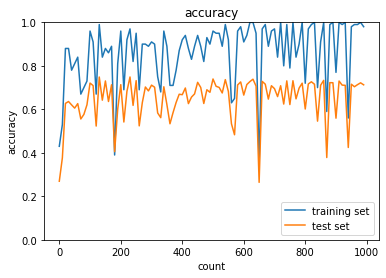

In [7]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

# 過学習を再現するために学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval = 10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定
weight_decay_lambda = 0.005


for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  d_batch = d_train[batch_mask]

  # 勾配
  grad = network.gradient(x_batch, d_batch)
  weight_decay = 0

  for idx in range(1, hidden_layer_num+1):
    grad['W'+str(idx)] = network.layers['Affine'+str(idx)].dW + weight_decay_lambda * np.sign(network.params['W'+str(idx)])
    grad['b'+str(idx)] = network.layers['Affine'+str(idx)].db
    network.params['W'+str(idx)] -= learning_rate * grad['W'+str(idx)]
    network.params['b'+str(idx)] -= learning_rate * grad['b'+str(idx)]
    # L1正則化
    weight_decay +=weight_decay_lambda * np.sum(np.abs(network.params['W'+str(idx)]))

  loss = network.loss(x_batch, d_batch) + weight_decay
  train_loss_list.append(loss)


  if (i + 1) % plot_interval == 0:
    accr_test = network.accuracy(x_test, d_test)
    accuracies_test.append(accr_test)
    accr_train = network.accuracy(x_batch, d_batch)
    accuracies_train.append(accr_train)

    print('Generation: '+ str(i+1) + '.正答率（train) = ' + str(accr_train))
    print('             :' + str(i+1) + '.正答率(test) =' + str(accr_test))

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label='training set')
plt.plot(lists, accuracies_test, label='test set')
plt.legend(loc='lower right')
plt.title('accuracy')
plt.xlabel('count')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
# グラフの表示
plt.show()


Dropout

In [8]:
class Dropout:
  def __init__(self, dropout_ratio=0.5):
    self.dropout_ratio = dropout_ratio
    self.mask = None

  def forward(self, x, train_flg=True):
    if train_flg:
      self.mask = np.random.rand(*x.shape) > self.dropout_ratio
      return x * self.mask
    else:
      return x * (1.0 - self.dropout_ratio)
    
  def backward(self, dout):
    return dout * self.mask

Generation: 10.正答率（train) = 0.11
             :10.正答率(test) =0.1012
Generation: 20.正答率（train) = 0.1
             :20.正答率(test) =0.1117
Generation: 30.正答率（train) = 0.12
             :30.正答率(test) =0.121
Generation: 40.正答率（train) = 0.2
             :40.正答率(test) =0.1319
Generation: 50.正答率（train) = 0.13
             :50.正答率(test) =0.139
Generation: 60.正答率（train) = 0.16
             :60.正答率(test) =0.1519
Generation: 70.正答率（train) = 0.17
             :70.正答率(test) =0.1568
Generation: 80.正答率（train) = 0.18
             :80.正答率(test) =0.1593
Generation: 90.正答率（train) = 0.22
             :90.正答率(test) =0.1636
Generation: 100.正答率（train) = 0.27
             :100.正答率(test) =0.1708
Generation: 110.正答率（train) = 0.17
             :110.正答率(test) =0.1777
Generation: 120.正答率（train) = 0.24
             :120.正答率(test) =0.1879
Generation: 130.正答率（train) = 0.25
             :130.正答率(test) =0.1964
Generation: 140.正答率（train) = 0.2
             :140.正答率(test) =0.1976
Generation: 150.正答率（train) = 0.24
         

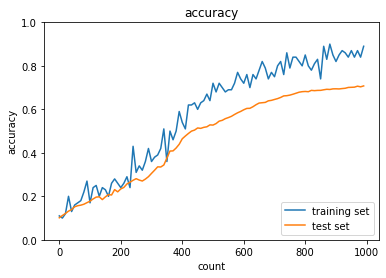

In [11]:
from common import optimizer

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

# 過学習を再現するために学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定
use_dropout = True
dropout_ratio = 0.15

# MultiLayerNetの初期値
weight_decay_lambda = 0.004

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout=use_dropout, dropout_ratio=dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval = 10

for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  d_batch = d_train[batch_mask]

  # 勾配
  grad = network.gradient(x_batch, d_batch)
  optimizer.update(network.params, grad)

  loss = network.loss(x_batch, d_batch)
  train_loss_list.append(loss)


  if (i + 1) % plot_interval == 0:
    accr_test = network.accuracy(x_test, d_test)
    accuracies_test.append(accr_test)
    accr_train = network.accuracy(x_batch, d_batch)
    accuracies_train.append(accr_train)

    print('Generation: '+ str(i+1) + '.正答率（train) = ' + str(accr_train))
    print('             :' + str(i+1) + '.正答率(test) =' + str(accr_test))

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label='training set')
plt.plot(lists, accuracies_test, label='test set')
plt.legend(loc='lower right')
plt.title('accuracy')
plt.xlabel('count')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
# グラフの表示
plt.show()


Generation: 10.正答率（train) = 0.08
             :10.正答率(test) =0.116
Generation: 20.正答率（train) = 0.11
             :20.正答率(test) =0.1579
Generation: 30.正答率（train) = 0.24
             :30.正答率(test) =0.1931
Generation: 40.正答率（train) = 0.22
             :40.正答率(test) =0.2275
Generation: 50.正答率（train) = 0.26
             :50.正答率(test) =0.2557
Generation: 60.正答率（train) = 0.34
             :60.正答率(test) =0.281
Generation: 70.正答率（train) = 0.34
             :70.正答率(test) =0.3063
Generation: 80.正答率（train) = 0.42
             :80.正答率(test) =0.3358
Generation: 90.正答率（train) = 0.39
             :90.正答率(test) =0.3509
Generation: 100.正答率（train) = 0.59
             :100.正答率(test) =0.3709
Generation: 110.正答率（train) = 0.44
             :110.正答率(test) =0.3905
Generation: 120.正答率（train) = 0.42
             :120.正答率(test) =0.3935
Generation: 130.正答率（train) = 0.49
             :130.正答率(test) =0.4144
Generation: 140.正答率（train) = 0.49
             :140.正答率(test) =0.4184
Generation: 150.正答率（train) = 0.5
       

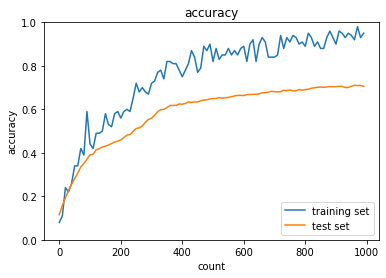

In [13]:
from common import optimizer

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

# 過学習を再現するために学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定
use_dropout = True
dropout_ratio = 0.08

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout=use_dropout, dropout_ratio=dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval = 10

# 正則化強度設定
weight_decay_lambda = 0.004

for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  d_batch = d_train[batch_mask]

  # 勾配
  grad = network.gradient(x_batch, d_batch)
  weight_decay = 0

  for idx in range(1, hidden_layer_num+1):
    grad['W'+str(idx)] = network.layers['Affine'+str(idx)].dW + weight_decay_lambda * np.sign(network.params['W'+str(idx)])
    grad['b'+str(idx)] = network.layers['Affine'+str(idx)].db
    network.params['W'+str(idx)] -= learning_rate * grad['W'+str(idx)]
    network.params['b'+str(idx)] -= learning_rate * grad['b'+str(idx)]
    # L1正則化
    weight_decay +=weight_decay_lambda * np.sum(np.abs(network.params['W'+str(idx)]))

  loss = network.loss(x_batch, d_batch) + weight_decay
  train_loss_list.append(loss)


  if (i + 1) % plot_interval == 0:
    accr_test = network.accuracy(x_test, d_test)
    accuracies_test.append(accr_test)
    accr_train = network.accuracy(x_batch, d_batch)
    accuracies_train.append(accr_train)

    print('Generation: '+ str(i+1) + '.正答率（train) = ' + str(accr_train))
    print('             :' + str(i+1) + '.正答率(test) =' + str(accr_test))

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label='training set')
plt.plot(lists, accuracies_test, label='test set')
plt.legend(loc='lower right')
plt.title('accuracy')
plt.xlabel('count')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
# グラフの表示
plt.show()
